## simulations on update dsfdr function (03/07/17)

In [1]:
import numpy as np
import scipy as sp
import scipy.stats
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import linalg as LA

import pickle

import transform
import statistics
import simulation
import dsfdr

%matplotlib notebook
import matplotlib.pyplot as plt
import pylab

%load_ext autoreload
%autoreload 2

## preliminary simulation

In [2]:
np.random.seed(31)

ss0 = [5, 10, 15, 20, 30, 40, 50, 100]
B = 100
sig_bh0 = []
sig_fbh0 = []
sig_ds0 = []

otu_bh0 = []
otu_fbh0 = []
otu_ds0 = []

pval_bh0 = []
pval_fbh0 = []
pval_ds0 = []

for j in ss0:
    for i in range(B):
        data0, labels0 = simulation.simulatedat(numsamples = j, numdiff=0, numc =100, numd=0)
        rej_bh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds0 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        r_bh0 = np.sum(rej_bh0[0])
        sig_bh0.append(r_bh0)
        pval_bh0.append(rej_bh0[2])
        
        r_fbh0 = np.sum(rej_fbh0[0])
        sig_fbh0.append(r_fbh0)
        pval_fbh0.append(rej_fbh0[2])

        r_ds0 = np.sum(rej_ds0[0])
        sig_ds0.append(r_ds0)
        pval_ds0.append(rej_ds0[2])

    otu_bh0.append(np.mean(sig_bh0))
    otu_fbh0.append(np.mean(sig_fbh0))
    otu_ds0.append(np.mean(sig_ds0))

In [3]:
with open("simulation0.pkl", "wb") as f:
    pickle.dump((ss0, otu_bh0, otu_fbh0, otu_ds0, 
                 pval_bh0, pval_fbh0, pval_ds0), f)

<IPython.core.display.Javascript object>


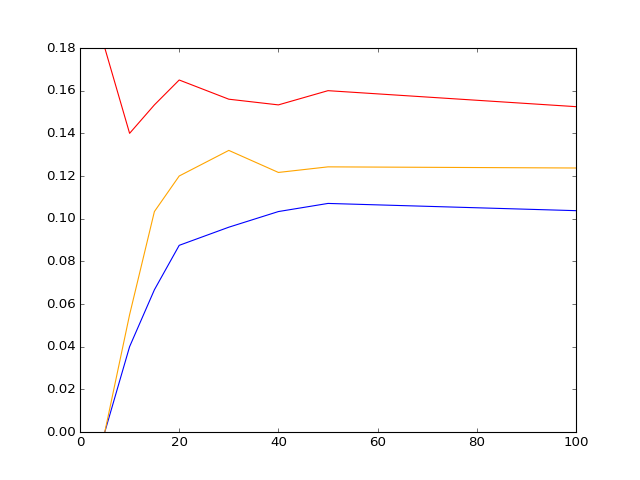

In [4]:
plt.figure()
plt.plot(ss0, otu_bh0, color = 'blue')
plt.plot(ss0, otu_fbh0, color = 'orange')
plt.plot(ss0, otu_ds0, color = 'red')

In [5]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)

gap = []
for i in range(100):
    dist = x[i] - y[i]
    if dist > 0:
        gap.append(dist)
    if dist <= 0:
        gap.append(0)
norm = np.sum(gap)
print(norm)

1.06185814186


1.96344655345


<IPython.core.display.Javascript object>


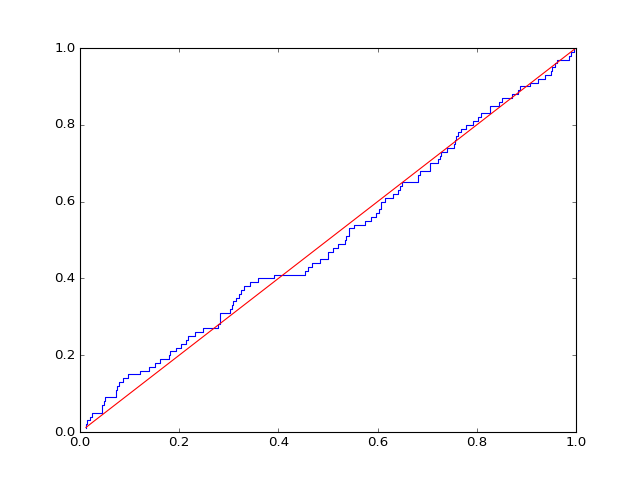

In [6]:
sample = pval_ds0[698]
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x - y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')

Simulation with all true nulls

In [361]:
np.random.seed(31)

ss10 = [5, 10, 15, 20, 30, 40, 50, 100]
B = 100
sig_bh10 = []
sig_fbh10 = []
sig_ds10 = []

otu_bh10 = []
otu_fbh10 = []
otu_ds10 = []

pval_bh10 = []
pval_fbh10 = []
pval_ds10 = []


for j in ss10:
    for i in range(B):
        data0, labels0 = simulation.simulatedat(numsamples = j, numdiff=0, numc =100, numd=100)
        rej_bh10 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh10 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds10 = dsfdr.dsfdr(data0, labels0, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        r_bh10 = np.sum(rej_bh10[0])
        sig_bh10.append(r_bh10)
        pval_bh10.append(rej_bh10[2])
        
        r_fbh10 = np.sum(rej_fbh10[0])
        sig_fbh10.append(r_fbh10)
        pval_fbh10.append(rej_fbh10[2])

        r_ds10 = np.sum(rej_ds10[0])
        sig_ds10.append(r_ds10)
        pval_ds10.append(rej_ds10[2])

    otu_bh10.append(np.mean(sig_bh10))
    otu_fbh10.append(np.mean(sig_fbh10))
    otu_ds10.append(np.mean(sig_ds10))

<IPython.core.display.Javascript object>


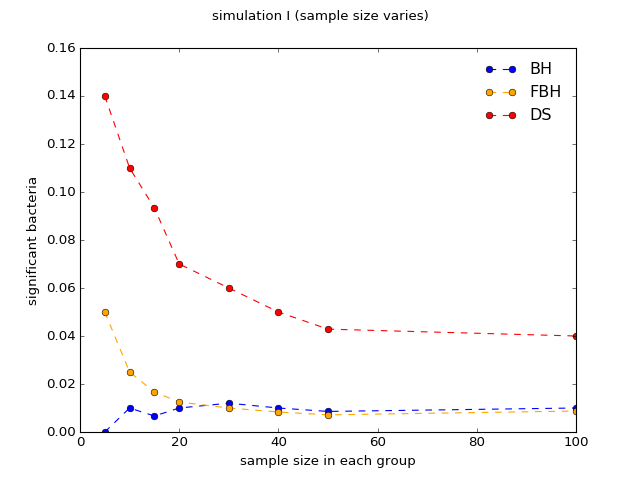

In [365]:
plt.figure()
plt.plot(ss10, otu_bh10, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss10, otu_fbh10, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss10, otu_ds10, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


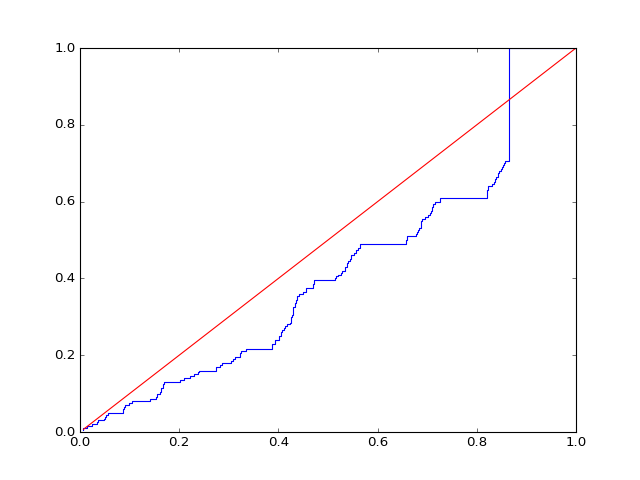

In [363]:
sample = pval_ds10[98]  # pvals for smaple size = 5
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x-y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')


<IPython.core.display.Javascript object>


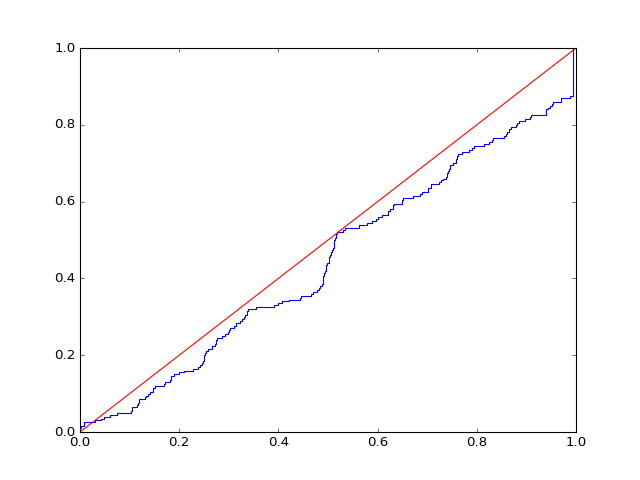

In [364]:
sample = pval_ds10[798]  # pvals for smaple size = 100
ecdf = ECDF(sample)

x = np.sort(sample)
y = ecdf(x)
print(LA.norm(x-y, 1))

plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')



## simulation 1

In [75]:
np.random.seed(31)

B = 100
ss1 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh1 = []
fdr_fbh1 = []
fdr_ds1 = []

sig_bh1 = []
sig_fbh1 = []
sig_ds1 = []

otu_bh1 = []
otu_fbh1 = []
otu_ds1 = []

pval_bh1 = []
pval_fbh1 = []
pval_ds1 = []

FDR_bh1 = []
FDR_fbh1 = []
FDR_ds1 = []

for j in ss1:
    for i in range(B):
        data1,labels1 = simulation.simulatedat(numsamples = j, numdiff=100, numc =100, numd=800)
        rej_bh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='bhfdr')
        rej_fbh1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='filterBH')
        rej_ds1 = dsfdr.dsfdr(data1, labels1, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdr_method ='dsfdr')
        
        v_bh1 = np.sum(np.where(rej_bh1[0])[0]>=100)
        r_bh1 = np.sum(rej_bh1[0])
        sig_bh1.append(r_bh1)
        fdr_bh1.append(v_bh1/r_bh1)
        pval_bh1.append(rej_bh1[2])
        
        v_fbh1 = np.sum(np.where(rej_fbh1[0])[0]>=100)
        r_fbh1 = np.sum(rej_fbh1[0])
        sig_fbh1.append(r_fbh1)
        fdr_fbh1.append(v_fbh1/r_fbh1)
        pval_fbh1.append(rej_fbh1[2])
        
        v_ds1 = np.sum(np.where(rej_ds1[0])[0]>=100)
        r_ds1 = np.sum(rej_ds1[0])
        sig_ds1.append(r_ds1)
        fdr_ds1.append(v_ds1/r_ds1)
        pval_ds1.append(rej_ds1[2])

    print('otu...: %s' %(j))   
    otu_bh1.append(np.mean(sig_bh1))
    otu_fbh1.append(np.mean(sig_fbh1))
    otu_ds1.append(np.mean(sig_ds1))
    
    print('FDR...: %s' %(j))
    FDR_bh1.append(np.nanmean(fdr_bh1))
    FDR_fbh1.append(np.nanmean(fdr_fbh1))
    FDR_ds1.append(np.nanmean(fdr_ds1))
 

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in long_scalars


otu...: 4
FDR...: 4


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 5
FDR...: 5
otu...: 6
FDR...: 6
otu...: 7
FDR...: 7
otu...: 8
FDR...: 8
otu...: 9
FDR...: 9
otu...: 10
FDR...: 10
otu...: 15
FDR...: 15
otu...: 20
FDR...: 20
otu...: 30
FDR...: 30
otu...: 40
FDR...: 40
otu...: 50
FDR...: 50
otu...: 100
FDR...: 100


In [414]:
with open("simulation1.pkl", "wb") as f:
    pickle.dump((ss1, otu_bh1, otu_fbh1, otu_ds1, 
                 FDR_bh1, FDR_fbh1, FDR_ds1, 
                 pval_bh1, pval_fbh1, pval_ds1), f)

#with open("temp.pkl", "rb") as f:
    #otu_bh1, otu_fbh1, otu_ds1, FDR_bh1, FDR_fbh1, FDR_ds1, pval_bh1, pval_fbh1, pval_ds1 = pickle.load(f) 

<IPython.core.display.Javascript object>


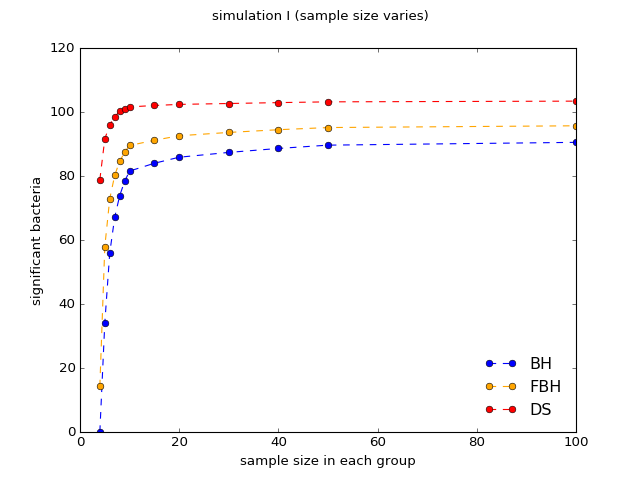

In [260]:
plt.figure()
plt.plot(ss1, otu_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, otu_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, otu_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


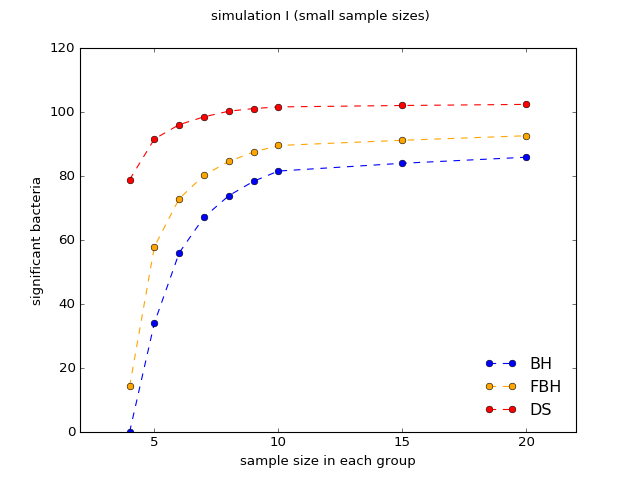

In [265]:
plt.figure()
plt.plot(ss1[0:9], otu_bh1[0:9], linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1[0:9], otu_fbh1[0:9], linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1[0:9], otu_ds1[0:9], linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.xlim([2, 22])
pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation I (small sample sizes)')
plt.xlabel('sample size in each group')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


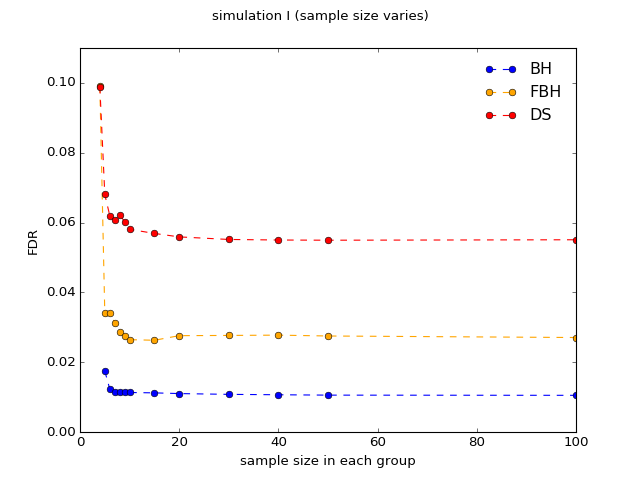

In [269]:
plt.figure()
plt.plot(ss1, FDR_bh1, linestyle='--', marker='o', color = 'blue', label = 'BH')
plt.plot(ss1, FDR_fbh1, linestyle='--', marker='o', color = 'orange', label = 'FBH')
plt.plot(ss1, FDR_ds1, linestyle='--', marker='o', color = 'red', label = 'DS')
pylab.legend(loc ='upper right', frameon=False)
pylab.ylim([0, 0.11])
plt.suptitle('simulation I (sample size varies)')
plt.xlabel('sample size in each group')
plt.ylabel('FDR')

In [109]:
np.shape(pval_ds1)

(1300, 1000)

In [291]:
# calculate L1 norms for sample size = 4, 6, 10

pval_ds1 = np.asarray(pval_ds1)
L1_4 = []
L1_6 = []
L1_10 = []

for i in range(100):
    x = pval_ds1[i, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4.append(LA.norm(x - y, 1))

for j in np.arange(200, 300, 1):
    x = pval_ds1[j, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_6.append(LA.norm(x - y, 1))
    
for k in np.arange(600, 700, 1):
    x = pval_ds1[k, 100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_10.append(LA.norm(x - y, 1))   
    
print(np.mean(L1_4), np.mean(L1_6), np.mean(L1_10))

101.496539827 98.4316950827 96.7579452325


<IPython.core.display.Javascript object>


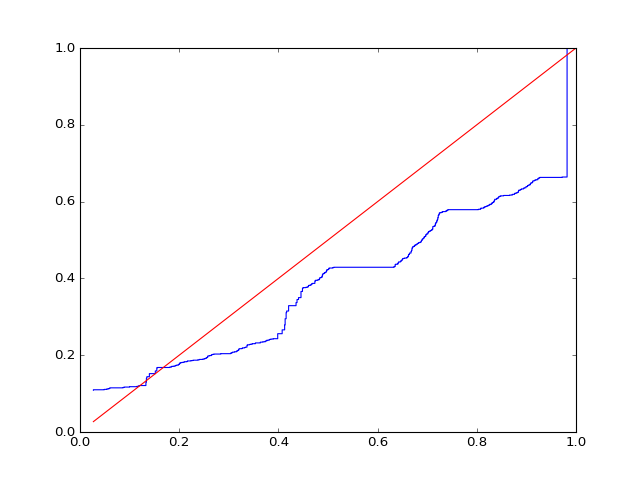

84.5349450549


In [244]:
sample = pval_ds1[98]  # pvals for smaple size = 4
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')


<IPython.core.display.Javascript object>


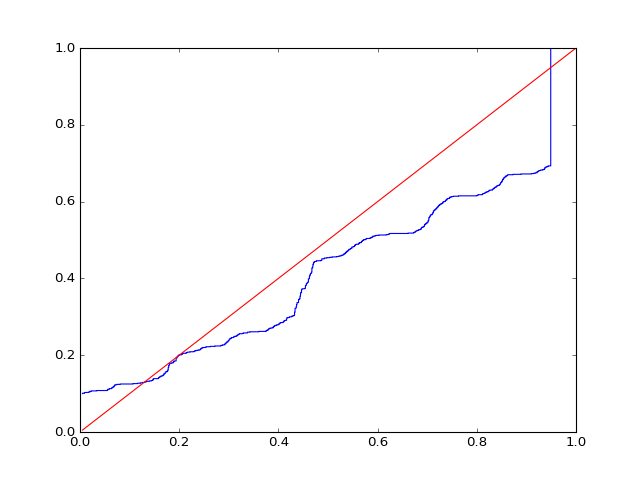

66.8005374625


In [247]:
sample = pval_ds1[298]  # pvals for smaple size = 6
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x-y, 1))

<IPython.core.display.Javascript object>


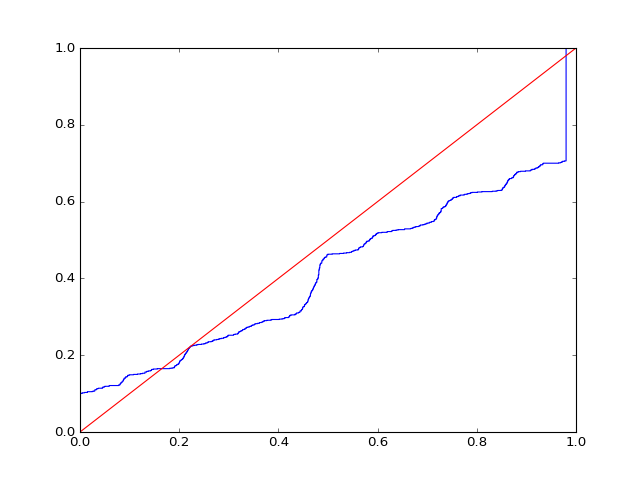

71.4323696304


In [249]:
sample = pval_ds1[620]  # pvals for smaple size = 10
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')


## simulation 2

In [120]:
np.random.seed(31)

B = 100
d = [400,800,2000,4000,8000,10000,15000,20000]
fdr_bh2 = []
fdr_fbh2 = []
fdr_ds2 = []

sig_bh2 = []
sig_fbh2 = []
sig_ds2 = []

otu_bh2 = []
otu_fbh2 = []
otu_ds2 = []

FDR_bh2 = []
FDR_fbh2 = []
FDR_ds2 = []

pval_bh2 = []
pval_fbh2 = []
pval_ds2 = []

for j in d:
    for i in range(B):
        data2,labels2 = simulation.simulatedat(numsamples = 10, numdiff=100, numc =100, numd=j)
        rej_bh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='bhfdr')
        rej_fbh2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='filterBH')
        rej_ds2 = dsfdr.dsfdr(data2, labels2, transform_type = 'rankdata', method = 'meandiff',
                             alpha=0.1, numperm=1000, fdr_method ='dsfdr')
        
        v_bh2 = np.sum(np.where(rej_bh2[0])[0]>=100)
        r_bh2 = np.sum(rej_bh2[0])
        sig_bh2.append(r_bh2)
        fdr_bh2.append(v_bh2/r_bh2)
        pval_bh2.append(rej_bh2[2])
        
        v_fbh2 = np.sum(np.where(rej_fbh2[0])[0]>=100)
        r_fbh2 = np.sum(rej_fbh2[0])
        sig_fbh2.append(r_fbh2)
        fdr_fbh2.append(v_fbh2/r_fbh2)
        pval_fbh2.append(rej_fbh2[2])
        
        v_ds2 = np.sum(np.where(rej_ds2[0])[0]>=100)
        r_ds2 = np.sum(rej_ds2[0])
        sig_ds2.append(r_ds2)
        fdr_ds2.append(v_ds2/r_ds2)
        pval_ds2.append(rej_ds2[2])
    
    print('otu...: %s' %(j)) 
    otu_bh2.append(np.mean(sig_bh2))
    otu_fbh2.append(np.mean(sig_fbh2))
    otu_ds2.append(np.mean(sig_ds2))
    
    print('FDR...: %s' %(j)) 
    FDR_bh2.append(np.nanmean(fdr_bh2))
    FDR_fbh2.append(np.nanmean(fdr_fbh2))
    FDR_ds2.append(np.nanmean(fdr_ds2))
 



otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 2000
FDR...: 2000
otu...: 4000
FDR...: 4000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in long_scalars


otu...: 20000
FDR...: 20000


In [416]:
#d = [400,800,2000,4000,8000,10000,15000,20000]

with open("simulation2.pkl", "wb") as f:
    pickle.dump((d, otu_bh2, otu_fbh2, otu_ds2, 
                 FDR_bh2, FDR_fbh2, FDR_ds2, 
                 pval_bh2, pval_fbh2, pval_ds2), f)

In [354]:
# calculate L1 norms for noise size = 4k, 8k, 10k, 15k, 20k


L1_4k = []
L1_8k = []
L1_10k = []
L1_15k = []
L1_20k = []

for i in np.arange(300, 400, 1):
    x = pval_ds2[0][i][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_4k.append(LA.norm(x - y, 1))

for j in np.arange(400, 500, 1):
    x = pval_ds2[0][j][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_8k.append(LA.norm(x - y, 1))
    
for k in np.arange(500, 600, 1):
    x = pval_ds2[0][k][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_10k.append(LA.norm(x - y, 1))   

for m in np.arange(600, 700, 1):
    x = pval_ds2[0][m][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_15k.append(LA.norm(x - y, 1))  
    
for n in np.arange(700, 800, 1):
    x = pval_ds2[0][n][100:]
    x = np.sort(x)
    ecdf = ECDF(x)
    y = ecdf(x)
    L1_20k.append(LA.norm(x - y, 1))      
    
    
print(np.mean(L1_4k), np.mean(L1_8k), np.mean(L1_10k), np.mean(L1_15k), np.mean(L1_20k))

455.184484584 905.185060419 1131.11545911 1689.44157805 2242.91828205


<IPython.core.display.Javascript object>


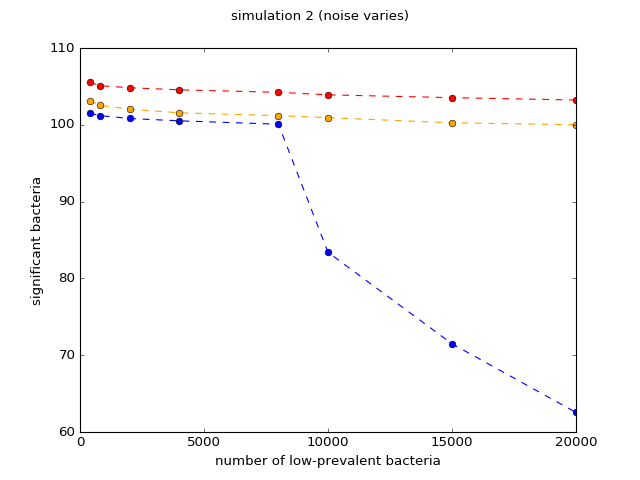

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [418]:
plt.figure()
plt.plot(d, otu_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, otu_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, otu_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('significant bacteria')

<IPython.core.display.Javascript object>


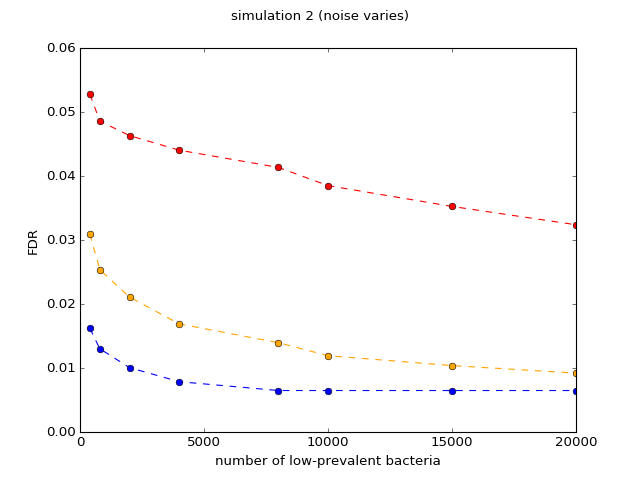

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [419]:
plt.figure()
plt.plot(d, FDR_bh2, linestyle='--', marker='o', color = 'blue')
plt.plot(d, FDR_fbh2, linestyle='--', marker='o', color = 'orange')
plt.plot(d, FDR_ds2, linestyle='--', marker='o', color = 'red')

pylab.legend(loc ='lower right', frameon=False)
plt.suptitle('simulation 2 (noise varies)')
plt.xlabel('number of low-prevalent bacteria')
plt.ylabel('FDR')

<IPython.core.display.Javascript object>


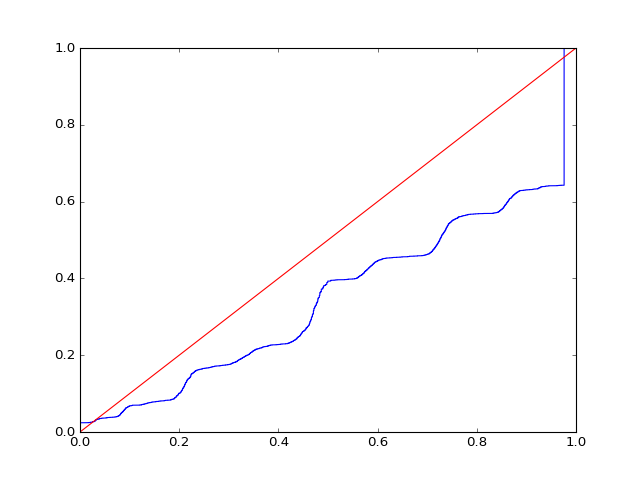

414.661163836


In [251]:
sample = pval_ds2[398]  # pvals for d=4k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x - y, 1))

<IPython.core.display.Javascript object>


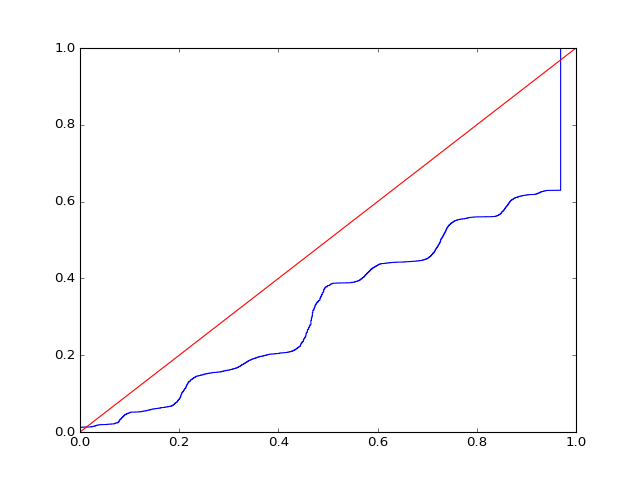

873.438659633


In [252]:
sample = pval_ds2[498]  # pvals for d=8k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x - y, 1))

<IPython.core.display.Javascript object>


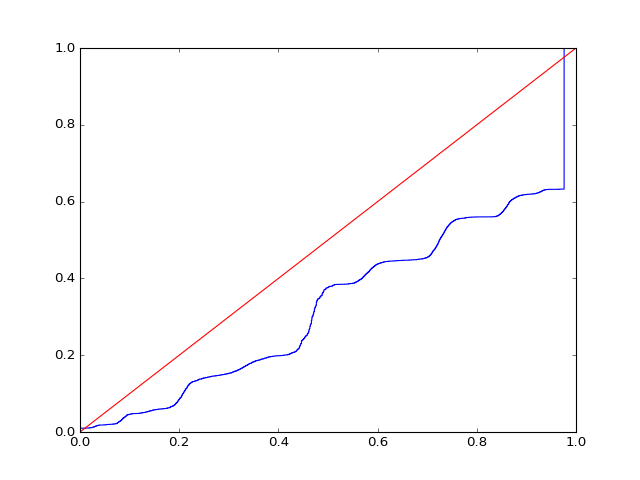

1115.0366078


In [253]:
sample = pval_ds2[598]  # pvals for d=10k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x-y, 1))

<IPython.core.display.Javascript object>


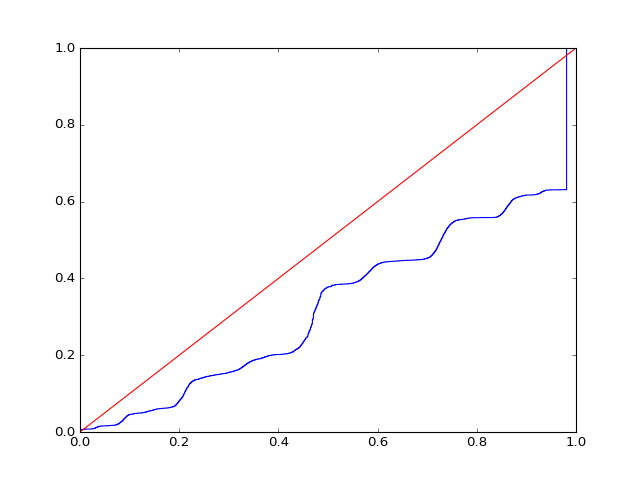

1666.90655437


In [254]:
sample = pval_ds2[688]  # pvals for smaple size = 15k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x-y, 1))

<IPython.core.display.Javascript object>


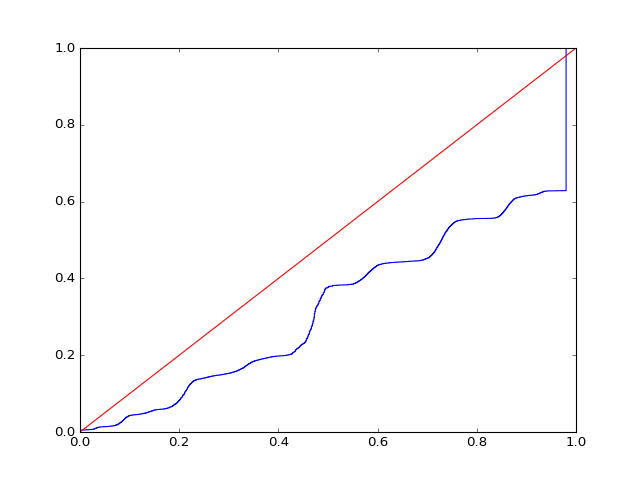

2237.37961534


In [255]:
sample = pval_ds2[778]  # pvals for smaple size = 20k
ecdf = ECDF(sample)

#x = np.linspace(min(sample), max(sample))
x = np.sort(sample)
y = ecdf(x)
plt.figure()
plt.step(x, y)
plt.plot(x, x, color = 'red')
print(LA.norm(x - y, 1))

In [17]:
# more discrete (larger sample size)
B = 100
d = [400,800,4000,4000,8000,10000,15000,40000]
fdr_bh4 = []
fdr_fbh4 = []
fdr_ds4 = []

sig_bh4 = []
sig_fbh4 = []
sig_ds4 = []

otu_bh4 = []
otu_fbh4 = []
otu_ds4 = []

FDR_bh4 = []
FDR_fbh4 = []
FDR_ds4 = []
for j in d:
    for i in range(B):
        data4,labels4=simulation.simulatedat(numsamples = 20, numdiff=100, numc =100, numd=j)
        rej_bh4=fdrmethods.dsfdr(data4,labels4,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh4=fdrmethods.dsfdr(data4,labels4,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds4=fdrmethods.dsfdr(data4,labels4,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh4 = np.sum(np.where(rej_bh4)[0]>=100)
        r_bh4 = np.sum(rej_bh4)
        sig_bh4.append(r_bh4)
        fdr_bh4.append(v_bh4/r_bh4)
        
        v_fbh4 = np.sum(np.where(rej_fbh4)[0]>=100)
        r_fbh4 = np.sum(rej_fbh4)
        sig_fbh4.append(r_fbh4)
        fdr_fbh4.append(v_fbh4/r_fbh4)
        
        v_ds4 = np.sum(np.where(rej_ds4)[0]>=100)
        r_ds4 = np.sum(rej_ds4)
        sig_ds4.append(r_ds4)
        fdr_ds4.append(v_ds4/r_ds4)
    
    print('otu...: %s' %(j)) 
    otu_bh4.append(np.mean(sig_bh4))
    otu_fbh4.append(np.mean(sig_fbh4))
    otu_ds4.append(np.mean(sig_ds4))
    
    print('FDR...: %s' %(j)) 
    FDR_bh4.append(np.nanmean(fdr_bh4))
    FDR_fbh4.append(np.nanmean(fdr_fbh4))
    FDR_ds4.append(np.nanmean(fdr_ds4))

otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 4000
FDR...: 4000
otu...: 4000
FDR...: 4000
otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in long_scalars


otu...: 40000
FDR...: 40000


<IPython.core.display.Javascript object>


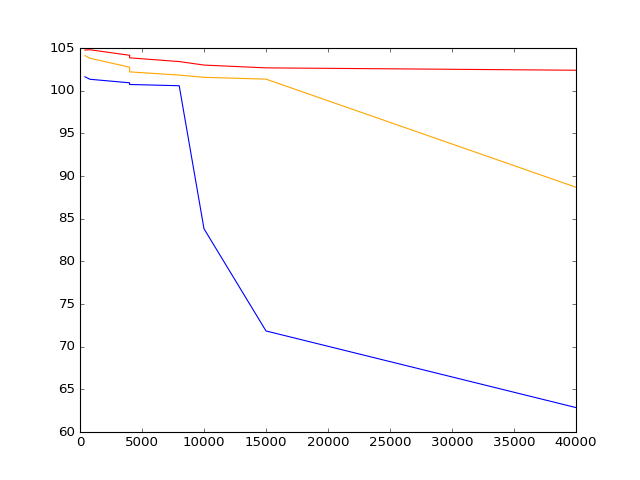

In [18]:
plt.figure()
plt.plot(d, otu_bh4, color = 'blue')
plt.plot(d, otu_fbh4, color = 'orange')
plt.plot(d, otu_ds4, color = 'red')

<IPython.core.display.Javascript object>


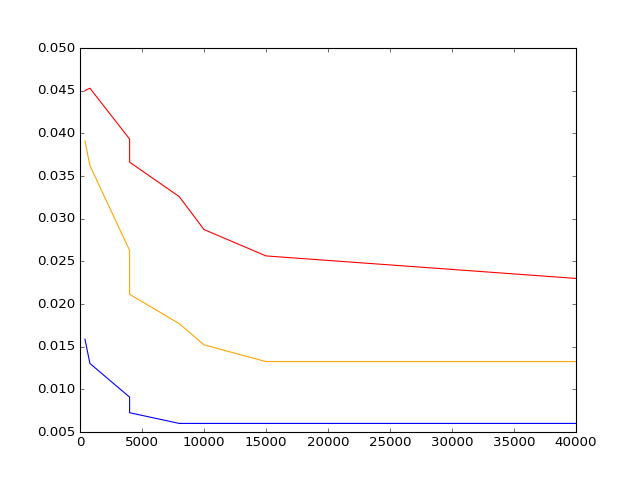

In [19]:
plt.figure()
plt.plot(d, FDR_bh4, color = 'blue')
plt.plot(d, FDR_fbh4, color = 'orange')
plt.plot(d, FDR_ds4, color = 'red')

## simulation 1 with compositionality

In [13]:
B = 100
ss3 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh3 = []
fdr_fbh3 = []
fdr_ds3 = []

sig_bh3 = []
sig_fbh3 = []
sig_ds3 = []

otu_bh3 = []
otu_fbh3 = []
otu_ds3 = []

FDR_bh3 = []
FDR_fbh3 = []
FDR_ds3 = []

for j in ss3:
    for i in range(B):
        data3,labels3=simulation.simulatedat(normalize=True, numsamples = j, numdiff=100, numc =100, numd=800)
        rej_bh3=fdrmethods.dsfdr(data3,labels3,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh3=fdrmethods.dsfdr(data3,labels3,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds3=fdrmethods.dsfdr(data3,labels3,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh3 = np.sum(np.where(rej_bh3)[0]>=100)
        r_bh3 = np.sum(rej_bh3)
        sig_bh3.append(r_bh3)
        fdr_bh3.append(v_bh3/r_bh3)
        
        v_fbh3 = np.sum(np.where(rej_fbh3)[0]>=100)
        r_fbh3 = np.sum(rej_fbh3)
        sig_fbh3.append(r_fbh3)
        fdr_fbh3.append(v_fbh3/r_fbh3)
        
        v_ds3 = np.sum(np.where(rej_ds3)[0]>=100)
        r_ds3 = np.sum(rej_ds3)
        sig_ds3.append(r_ds3)
        fdr_ds3.append(v_ds3/r_ds3)
        
    print('otu...: %s' %(j))  
    otu_bh3.append(np.mean(sig_bh3))
    otu_fbh3.append(np.mean(sig_fbh3))
    otu_ds3.append(np.mean(sig_ds3))
    
    print('FDR...: %s' %(j))  
    FDR_bh3.append(np.nanmean(fdr_bh3))
    FDR_fbh3.append(np.nanmean(fdr_fbh3))
    FDR_ds3.append(np.nanmean(fdr_ds3))

/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in long_scalars


otu...: 4
FDR...: 4


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in long_scalars


otu...: 5
FDR...: 5
otu...: 6
FDR...: 6
otu...: 7
FDR...: 7
otu...: 8
FDR...: 8
otu...: 9
FDR...: 9
otu...: 10
FDR...: 10
otu...: 15
FDR...: 15
otu...: 20
FDR...: 20
otu...: 30
FDR...: 30
otu...: 40
FDR...: 40
otu...: 50
FDR...: 50
otu...: 100
FDR...: 100


<IPython.core.display.Javascript object>


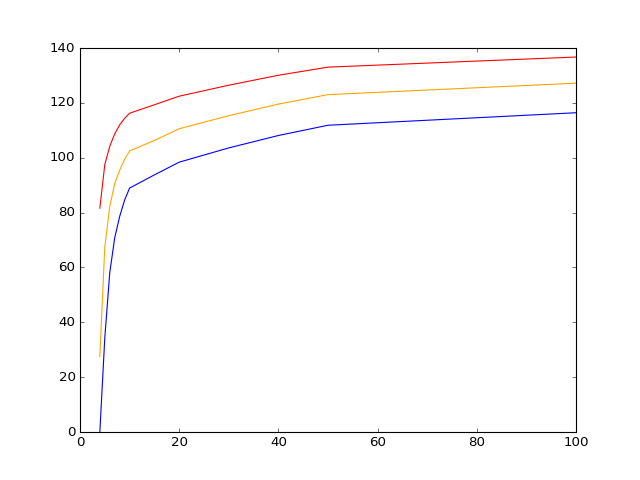

In [15]:
plt.figure()
plt.plot(ss3, otu_bh3, color = 'blue')
plt.plot(ss3, otu_fbh3, color = 'orange')
plt.plot(ss3, otu_ds3, color = 'red')

<IPython.core.display.Javascript object>


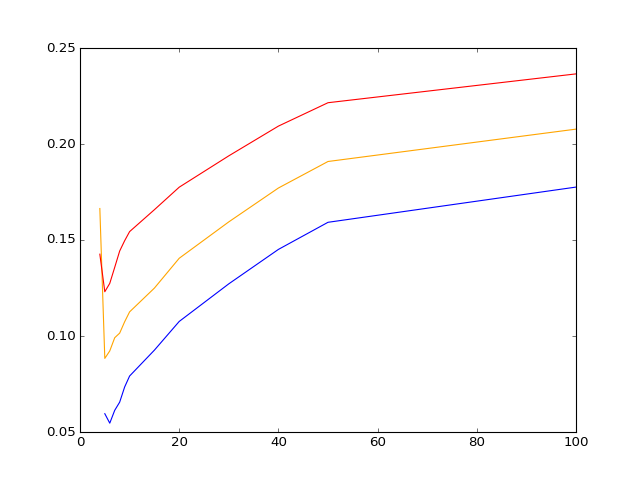

In [16]:
plt.figure()
plt.plot(ss3, FDR_bh3, color = 'blue')
plt.plot(ss3, FDR_fbh3, color = 'orange')
plt.plot(ss3, FDR_ds3, color = 'red')

In [ ]:
## with clr transformation

In [ ]:
B = 100
ss3 = [4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50, 100]
fdr_bh3 = []
fdr_fbh3 = []
fdr_ds3 = []

sig_bh3 = []
sig_fbh3 = []
sig_ds3 = []

otu_bh3 = []
otu_fbh3 = []
otu_ds3 = []

FDR_bh3 = []
FDR_fbh3 = []
FDR_ds3 = []

for j in ss3:
    for i in range(B):
        data3,labels3=simulation.simulatedat(normalize=True, numsamples = j, numdiff=100, numc =100, numd=800)
        rej_bh3=dsfdr.dsfdr(data3,labels3,transform_type = 'rankdata', fdr_method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrfdr_method ='bhfdr')[0]
        rej_fbh3=dsfdr.dsfdr(data3,labels3,transform_type = 'rankdata', fdr_method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrfdr_method ='filterBH')[0]
        rej_ds3=dsfdr.dsfdr(data3,labels3,transform_type = 'rankdata', fdr_method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrfdr_method ='dsfdr')[0]
        
        v_bh3 = np.sum(np.where(rej_bh3)[0]>=100)
        r_bh3 = np.sum(rej_bh3)
        sig_bh3.append(r_bh3)
        fdr_bh3.append(v_bh3/r_bh3)
        
        v_fbh3 = np.sum(np.where(rej_fbh3)[0]>=100)
        r_fbh3 = np.sum(rej_fbh3)
        sig_fbh3.append(r_fbh3)
        fdr_fbh3.append(v_fbh3/r_fbh3)
        
        v_ds3 = np.sum(np.where(rej_ds3)[0]>=100)
        r_ds3 = np.sum(rej_ds3)
        sig_ds3.append(r_ds3)
        fdr_ds3.append(v_ds3/r_ds3)
        
    print('otu...: %s' %(j))  
    otu_bh3.append(np.mean(sig_bh3))
    otu_fbh3.append(np.mean(sig_fbh3))
    otu_ds3.append(np.mean(sig_ds3))
    
    print('FDR...: %s' %(j))  
    FDR_bh3.append(np.nanmean(fdr_bh3))
    FDR_fbh3.append(np.nanmean(fdr_fbh3))
    FDR_ds3.append(np.nanmean(fdr_ds3))

## Simulation 2 with compositionality

In [20]:
B = 100
d = [400,800,2000,4000,8000,10000,15000,20000]
fdr_bh5 = []
fdr_fbh5 = []
fdr_ds5 = []

sig_bh5 = []
sig_fbh5 = []
sig_ds5 = []

otu_bh5 = []
otu_fbh5 = []
otu_ds5 = []

FDR_bh5 = []
FDR_fbh5 = []
FDR_ds5 = []
for j in d:
    for i in range(B):
        data5,labels5=simulation.simulatedat(normalize=True, numsamples = 10, numdiff=100, numc =100, numd=j)
        rej_bh5=fdrmethods.dsfdr(data5,labels5,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='bhfdr')[0]
        rej_fbh5=fdrmethods.dsfdr(data5,labels5,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='filterBH')[0]
        rej_ds5=fdrmethods.dsfdr(data5,labels5,transformtype = 'rankdata', method = 'meandiff',
                             alpha=0.1,numperm=1000, fdrmethod ='dsfdr')[0]
        
        v_bh5 = np.sum(np.where(rej_bh5)[0]>=100)
        r_bh5 = np.sum(rej_bh5)
        sig_bh5.append(r_bh5)
        fdr_bh5.append(v_bh5/r_bh5)
        
        v_fbh5 = np.sum(np.where(rej_fbh5)[0]>=100)
        r_fbh5 = np.sum(rej_fbh5)
        sig_fbh5.append(r_fbh5)
        fdr_fbh5.append(v_fbh5/r_fbh5)
        
        v_ds5 = np.sum(np.where(rej_ds5)[0]>=100)
        r_ds5 = np.sum(rej_ds5)
        sig_ds5.append(r_ds5)
        fdr_ds5.append(v_ds5/r_ds5)
    
    print('otu...: %s' %(j)) 
    otu_bh5.append(np.mean(sig_bh5))
    otu_fbh5.append(np.mean(sig_fbh5))
    otu_ds5.append(np.mean(sig_ds5))
    
    print('FDR...: %s' %(j)) 
    FDR_bh5.append(np.nanmean(fdr_bh5))
    FDR_fbh5.append(np.nanmean(fdr_fbh5))
    FDR_ds5.append(np.nanmean(fdr_ds5))

otu...: 400
FDR...: 400
otu...: 800
FDR...: 800
otu...: 2000
FDR...: 2000
otu...: 4000
FDR...: 4000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 8000
FDR...: 8000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 10000
FDR...: 10000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars
/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in long_scalars


otu...: 15000
FDR...: 15000


/Users/serene/miniconda3/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in long_scalars


otu...: 20000
FDR...: 20000


<IPython.core.display.Javascript object>


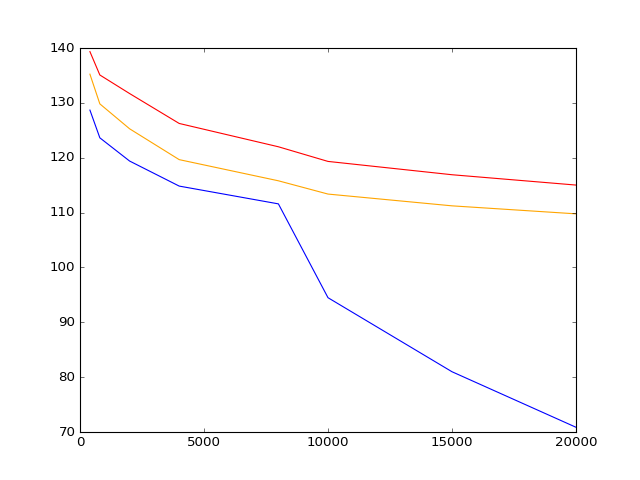

In [21]:
plt.figure()
plt.plot(d, otu_bh5, color = 'blue')
plt.plot(d, otu_fbh5, color = 'orange')
plt.plot(d, otu_ds5, color = 'red')

<IPython.core.display.Javascript object>


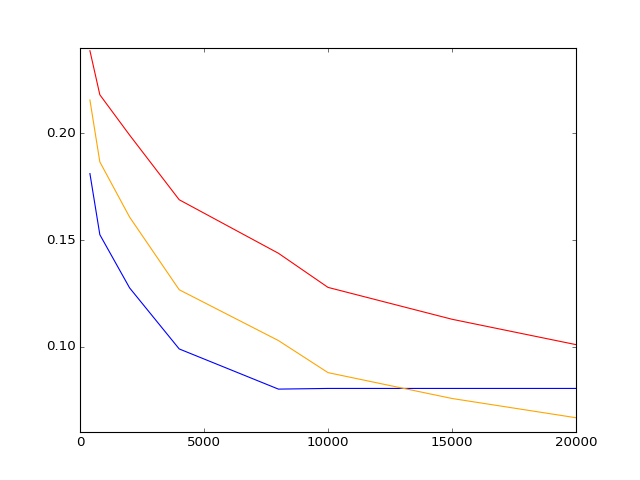

In [22]:
plt.figure()
plt.plot(d, FDR_bh5, color = 'blue')
plt.plot(d, FDR_fbh5, color = 'orange')
plt.plot(d, FDR_ds5, color = 'red')